In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# 데이터 로드
df = pd.read_csv("C:/Users/jinwo/Downloads/titanic.csv")

In [5]:
# ==============================
# 1. 데이터 확인
# ==============================
df
print("컬럼 확인:", df.columns)

컬럼 확인: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
# ==============================
# 2. 결측치 확인 (제거 전)
# ==============================
print("\n=== 결측치 개수 (제거 전) ===")
print(df.isnull().sum())


=== 결측치 개수 (제거 전) ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# ==============================
# 3. 결측치 제거 (Age인 경우 평균 나이로)
# ==============================
# age 컬럼의 평균값 계산 (결측치를 제외한 값으로 계산)

mean_age = df['Age'].mean()

# age 컬럼의 결측치를 평균값으로 채우기

df['Age'] = df['Age'].fillna(mean_age)

# 나머지 결측치 제거
df = df.dropna()

In [8]:
# 결측치 확인 (제거 후)
print("\n=== 결측치 개수 (제거 후) ===")
print(df.isnull().sum())


=== 결측치 개수 (제거 후) ===
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
# ==============================
# 4. 레이블 확인 (imbalanced data)
# ==============================
print("\n=== 레이블 분포 확인 (Survived) ===")
print(df['Survived'].value_counts())


=== 레이블 분포 확인 (Survived) ===
Survived
1    134
0     68
Name: count, dtype: int64


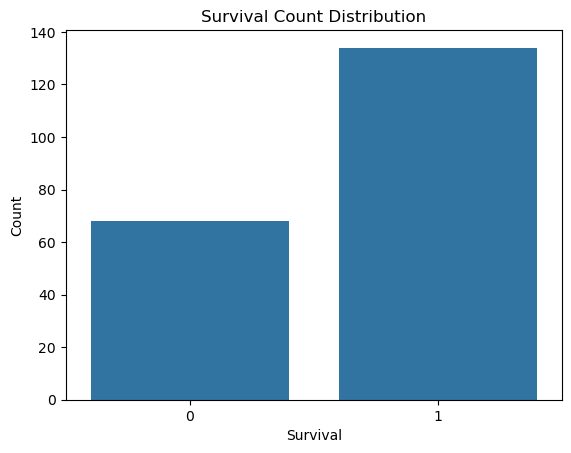

In [16]:
# 레이블 시각화
sns.countplot(data=df, x="Survived")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Survival Count Distribution")
plt.show()

In [18]:
# ==============================
# 5. 불필요한 컬럼 제거
# ==============================
columns_to_delete = ['PassengerId', 'Name', 'Ticket', 'Cabin']  # 삭제할 컬럼 리스트
df = df.drop(columns=columns_to_delete)

print("\n=== 불필요한 컬럼 제거 후 데이터셋 미리보기 ===")
print(df.head())


=== 불필요한 컬럼 제거 후 데이터셋 미리보기 ===
    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1          1       1  female  38.0      1      0  71.2833        C
3          1       1  female  35.0      1      0  53.1000        S
6          0       1    male  54.0      0      0  51.8625        S
10         1       3  female   4.0      1      1  16.7000        S
11         1       1  female  58.0      0      0  26.5500        S


In [20]:
# ==============================
# 6. 엔코딩 (숫자로 변환)
# ==============================
label_encoder = LabelEncoder()
columns_to_encode = ['Sex', 'Embarked']  # 인코딩할 컬럼 리스트

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print("\n=== 엔코딩 후 데이터셋 미리보기 ===")
print(df.head())


=== 엔코딩 후 데이터셋 미리보기 ===
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1          1       1    0  38.0      1      0  71.2833         0
3          1       1    0  35.0      1      0  53.1000         2
6          0       1    1  54.0      0      0  51.8625         2
10         1       3    0   4.0      1      1  16.7000         2
11         1       1    0  58.0      0      0  26.5500         2


In [22]:
# ==============================
# 7. 데이터 분할
# ==============================
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# ==============================
# 8. 5가지 분류 모델 적용
# ==============================

print("\n==================================")
print("  ACCURACY OF DIFFERENT CLASSIFIERS")
print("==================================")

# -------------------
# SVM (Support Vector Machine)
# -------------------
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, pred_svm):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_svm))


  ACCURACY OF DIFFERENT CLASSIFIERS

--- SVM Classifier ---
Accuracy: 0.8049
Confusion Matrix:
[[ 0  8]
 [ 0 33]]


In [26]:
# -------------------
# Logistic Regression
# -------------------
clf_lr = LogisticRegression(random_state=0, max_iter=1000)
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test)

print("\n--- Logistic Regression Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, pred_lr):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
Accuracy: 0.8293
Confusion Matrix:
[[ 5  3]
 [ 4 29]]


In [28]:
# -------------------
# Decision Tree
# -------------------
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)

print("\n--- Decision Tree Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, pred_dt):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
Accuracy: 0.9268
Confusion Matrix:
[[ 7  1]
 [ 2 31]]


In [30]:
# -------------------
# Random Forest
# -------------------
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
pred_rf = clf_rf.predict(X_test)

print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_rf))


--- Random Forest Classifier ---
Accuracy: 0.8049
Confusion Matrix:
[[ 6  2]
 [ 6 27]]


In [32]:
# -------------------
# K-Nearest Neighbors (KNN)
# -------------------
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)

print("\n--- KNN Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))


--- KNN Classifier ---
Accuracy: 0.7805
Confusion Matrix:
[[ 2  6]
 [ 3 30]]
